In [1]:
# Stop warnings
import warnings
warnings.filterwarnings("ignore")

# Imports
import numpy as np
import pandas as pd
import os
import json
import sys
import cortex
from scipy import stats
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


sys.path.append("{}/../../../utils".format(os.getcwd()))
from plot_utils import *
from surface_utils import load_surface
from pycortex_utils import get_rois, calculate_vertex_areas, data_from_rois, load_surface_pycortex
from maths_utils import linear_regression_surf, multipletests_surface

# Import data base
main_dir = '/Users/uriel/disks/meso_shared'
# main_dir = '/home/ulascombes//disks/meso_shared'
project_dir = 'RetinoMaps'
subjects = ['sub-01']
subject = 'sub-12'
format_ = 'fsnative'
tsv_dir ='{}/{}/derivatives/pp_data/{}/{}/prf/tsv'.format(main_dir, 
                                                                project_dir, 
                                                                subject,
                                                         format_)


with open('../../../settings.json') as f:
    json_s = f.read()
    analysis_info = json.loads(json_s)
rois = analysis_info['rois']


In [2]:
data = pd.read_table('{}/{}_css-all_derivatives.tsv'.format(tsv_dir,subject))
ecc_th = [0, 15]
size_th= [0.1, 20]
rsq_th = [0, 1]
pcm_th = [0,20]

In [ ]:
# General figure settings
template_specs = dict(axes_color="rgba(0, 0, 0, 1)",
                      axes_width=2,
                      axes_font_size=15,
                      bg_col="rgba(255, 255, 255, 1)",
                      font='Arial',
                      title_font_size=15,
                      plot_width=1.5)

# General figure settings
fig_template = plotly_template(template_specs)

In [ ]:
group_df_rois = data.groupby(['roi'], sort=False)['vert_area'].sum().reset_index()

In [ ]:
group_df_rois

In [ ]:
percentage = (group_df_rois_1pt.vert_area / group_df_rois.vert_area ) * 100

In [ ]:
group_df_rois_5pt

In [ ]:
data['vert_area'] = data['vert_area'] / 100
fig_width = 1200
fig_height = 600

group_df_rois = data.groupby(['roi'], sort=False)['vert_area'].sum().reset_index()

group_df_rois_5pt = data[data['corr_pvalue_5pt'] < 0.05].groupby(['roi'], sort=False)['vert_area'].sum().reset_index()
group_df_rois_5pt['percentage'] = ((group_df_rois_5pt.vert_area / group_df_rois.vert_area ) * 100).round()
group_df_rois_5pt['percentage'] = group_df_rois_5pt['percentage'].astype(int).astype(str) + '%'


group_df_rois_1pt = data[data['corr_pvalue_1pt'] < 0.01].groupby(['roi'], sort=False)['vert_area'].sum().reset_index()
group_df_rois_1pt['percentage'] = ((group_df_rois_1pt.vert_area / group_df_rois.vert_area ) * 100).round()
group_df_rois_1pt['percentage'] = group_df_rois_1pt['percentage'].astype(int).astype(str) + '%'





fig = make_subplots(rows=1, cols=2, subplot_titles=['FDR threshold = 0.05', 'FDR threshold = 0.01'])
fig.layout.annotations[0].update(x=0.1)
fig.layout.annotations[1].update(x=0.65)
    
# 0.05 
# total 
fig.add_trace(go.Bar(x=group_df_rois.roi, 
                     y=group_df_rois.vert_area, 
                     text=group_df_rois_5pt.percentage, 
                     textposition='outside',
                     textangle=-60,
                     showlegend=False, 
                     marker=dict(color=roi_colors, opacity=0.2)),
             row=1, col=1)

# significatif 
fig.add_trace(go.Bar(x=group_df_rois_5pt.roi, 
                     y=group_df_rois_5pt.vert_area, 

                     showlegend=False, 
                     marker=dict(color=roi_colors)),
             row=1, col=1)


# 0.01  
fig.add_trace(go.Bar(x=group_df_rois.roi, 
                     y=group_df_rois.vert_area, 
                     text=group_df_rois_1pt.percentage, 
                     textposition='outside',
                     textangle=-60,
                     showlegend=False, 
                     marker=dict(color=roi_colors, opacity=0.1)),
             row=1, col=2)

fig.add_trace(go.Bar(x=group_df_rois_1pt.roi, 
                     y=group_df_rois_1pt.vert_area, 
                     showlegend=False, 
                     marker=dict(color=roi_colors)),
             row=1, col=2)


# Settings
fig.update_xaxes(showline=True, 
                 ticklen=0, 
                 linecolor=('rgba(255,255,255,0)'))      

fig.update_yaxes(range=[0,1], 
                 showline=True, 
                 nticks=5, 
                 title_text='Area in mm<sup>2</sup>',secondary_y=False)


fig.update_layout(barmode='overlay',
                  
                  height=fig_height, 
                  width=fig_width, 

                  template=fig_template,
                  margin_l=100, 
                  margin_r=50, 
                  margin_t=100, 
                  margin_b=100)



fig.write_image("/Users/uriel/Downloads/{}_surface_area.pdf".format(subject))
fig.show()

In [ ]:
data

In [ ]:
group_df_rois.vert_area

In [23]:
def prf_roi_area(data, fig_width, fig_height, roi_colors):
    """
    Make bar plots of each roi area and the corresponding significative area of pRF  
    
    Parameters
    ----------
    data : A data dataframe
    fig_width : figure width in pixels
    fig_height : figure height in pixels
    roi_colors : list of rgb colors for plotly
    
    Returns
    -------
    fig : violins plot
    """
    
    # General figure settings
    template_specs = dict(axes_color="rgba(0, 0, 0, 1)",
                          axes_width=2,
                          axes_font_size=15,
                          bg_col="rgba(255, 255, 255, 1)",
                          font='Arial',
                          title_font_size=15,
                          plot_width=1.5)
    
    # General figure settings
    fig_template = plotly_template(template_specs)
    
    # General settings
    fig = make_subplots(rows=1, cols=2, subplot_titles=['FDR threshold = 0.05', 'FDR threshold = 0.01'])
    fig.layout.annotations[0].update(x=0.1)
    fig.layout.annotations[1].update(x=0.65)
    
    # Compute the area of each area 
    group_df_rois = data.groupby(['roi'], sort=False)['vert_area'].sum().reset_index()

    # Compute the area of significative vertex in each roi for FDR 0.05
    group_df_rois_5pt = data[data['corr_pvalue_5pt'] < 0.05].groupby(['roi'], sort=False)['vert_area'].sum().reset_index()
    group_df_rois_5pt['percentage'] = ((group_df_rois_5pt.vert_area / group_df_rois.vert_area ) * 100).round()
    group_df_rois_5pt['percentage'] = group_df_rois_5pt['percentage'].astype(int).astype(str) + '%'
    
    # Compute the area of significative vertex in each roi for FDR 0.01
    group_df_rois_1pt = data[data['corr_pvalue_1pt'] < 0.01].groupby(['roi'], sort=False)['vert_area'].sum().reset_index()
    group_df_rois_1pt['percentage'] = ((group_df_rois_1pt.vert_area / group_df_rois.vert_area ) * 100).round()
    group_df_rois_1pt['percentage'] = group_df_rois_1pt['percentage'].astype(int).astype(str) + '%'
    
    # plot for FDR 0.05
    # total bar 
    fig.add_trace(go.Bar(x=group_df_rois.roi, 
                         y=group_df_rois.vert_area, 
                         text=group_df_rois_5pt.percentage, 
                         textposition='outside',
                         textangle=-60,
                         showlegend=False, 
                         marker=dict(color=roi_colors, opacity=0.2)),
                 row=1, col=1)
    
    # significatif vertex bar
    fig.add_trace(go.Bar(x=group_df_rois_5pt.roi, 
                         y=group_df_rois_5pt.vert_area, 
    
                         showlegend=False, 
                         marker=dict(color=roi_colors)),
                 row=1, col=1)
    
    
    # plot for FDR 0.01 
    # total bar 
    fig.add_trace(go.Bar(x=group_df_rois.roi, 
                         y=group_df_rois.vert_area, 
                         text=group_df_rois_1pt.percentage, 
                         textposition='outside',
                         textangle=-60,
                         showlegend=False, 
                         marker=dict(color=roi_colors, opacity=0.1)),
                 row=1, col=2)
    
    # significatif vertex bar
    fig.add_trace(go.Bar(x=group_df_rois_1pt.roi, 
                         y=group_df_rois_1pt.vert_area, 
                         showlegend=False, 
                         marker=dict(color=roi_colors)),
                 row=1, col=2)

    # Define parameters
    fig.update_xaxes(showline=True, 
                     ticklen=0, 
                     linecolor=('rgba(255,255,255,0)'))      
    
    fig.update_yaxes(range=[0,80], 
                     showline=True, 
                     nticks=5, 
                     title_text='Area in mm<sup>2</sup>',secondary_y=False)
    
    fig.update_layout(barmode='overlay',
                      height=fig_height, 
                      width=fig_width, 
                      template=fig_template,
                      margin_l=100, 
                      margin_r=50, 
                      margin_t=100, 
                      margin_b=100)
    return fig 

In [7]:
# Figure settings
colormap_dict = {'V1': (243, 231, 155),
                 'V2': (250, 196, 132),
                 'V3': (248, 160, 126),
                 'V3AB': (235, 127, 134),
                 'LO': (150, 0, 90), 
                 'VO': (0, 0, 200),
                 'hMT+': (0, 25, 255),
                 'iIPS': (0, 152, 255),
                 'sIPS': (44, 255, 150),
                 'iPCS': (151, 255, 0),
                 'sPCS': (255, 234, 0),
                 'mPCS': (255, 111, 0)
                }


roi_colors = ['rgb({},{},{})'.format(*rgb) for rgb in colormap_dict.values()]
fig_width = 1200
fig_height = 600
fig = prf_roi_area(data, fig_width, fig_height, roi_colors)
fig.write_image("/Users/uriel/Downloads/{}_surface_area.pdf".format(subject))

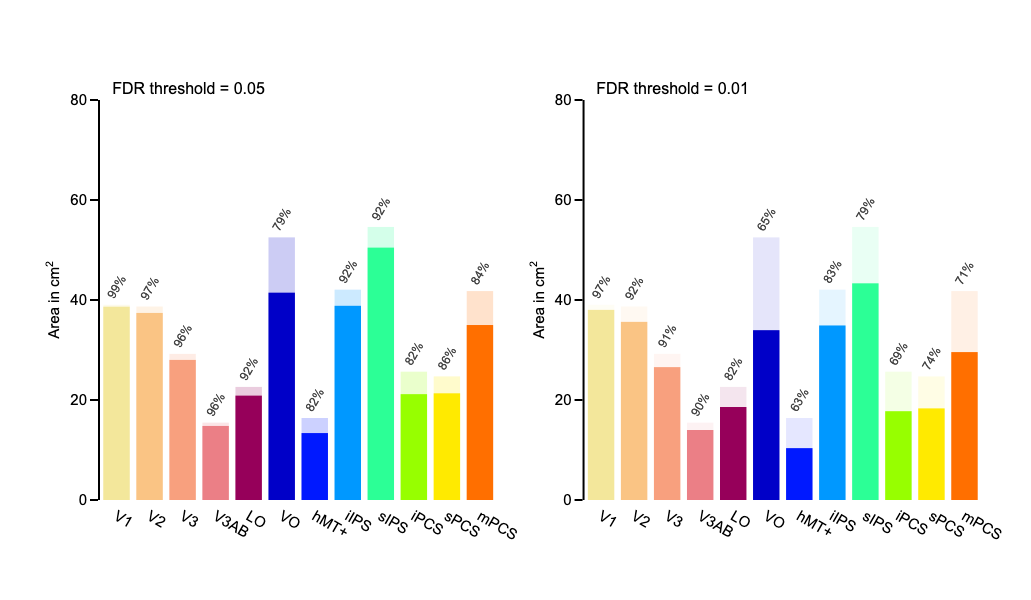

In [8]:
fig

# heat map

In [ ]:
def gaus_2d(gauss_x, gauss_y, gauss_sd, screen_side, grain=200):
    """
    Generate 2D gaussian mesh
    
    Parameters
    ----------
    gauss_x : mean x gaussian parameter in dva (e.g. 1 dva)
    gauss_y : mean y gaussian parameter in dva (e.g. 1 dva)
    gauss_sd : sd gaussian parameter in dva (e.g. 1 dva)
    screen_side : mesh screen side (square) im dva (e.g. 20 dva from -10 to 10 dva)
    grain : grain resolution of the mesh in pixels (default = 100 pixels)
    
    Returns
    -------
    x : linspace x of the mesh
    y : linspace x of the mesh
    z : mesh_z values (to plot)
    
    """
    x = np.linspace(-screen_side/2, screen_side/2, grain)
    y = np.linspace(-screen_side/2, screen_side/2, grain)
    mesh_x, mesh_y = np.meshgrid(x,y) 
    
    gauss_z = 1./(2.*np.pi*gauss_sd*gauss_sd)*np.exp(-((mesh_x-gauss_x)**2./(2.*gauss_sd**2.)+(mesh_y-gauss_y)**2./(2.*gauss_sd**2.)))
    return x, y, gauss_z

In [ ]:
len(data)

In [ ]:

vert = data.prf_loo_r2.idxmax()

In [ ]:
grain=200
x_tot = np.zeros(grain) 
y_tot = np.zeros(grain) 
gauss_z_tot = np.zeros((grain,grain)) 
for vert in range(len(data)):
    x, y, gauss_z = gaus_2d(gauss_x=data.prf_x[vert],  
                        gauss_y=data.prf_y[vert], 
                        gauss_sd=data.prf_size[vert], 
                        screen_side=30, 
                        grain=grain)

    gauss_z_tot += gauss_z * data.prf_loo_r2[vert]
gauss_z_tot = (gauss_z_tot-gauss_z_tot.min())/(gauss_z_tot.max()-gauss_z_tot.min())

In [ ]:
gauss_z_tot

In [ ]:
fig=go.Figure()
fig.add_trace(go.Histogram2dContour(x=x, y=y, z=gauss_z_tot, colorscale='viridis', showscale=True))
fig.update_layout(height=800, width=800)

In [ ]:
fig=go.Figure()
fig.add_trace(go.Heatmap(x=x, y=y, z=gauss_z_tot,colorscale='viridis', showscale=True))
fig.update_layout(height=800, width=800)

In [ ]:
grain = 200
x_tot = np.zeros(grain) 
y_tot = np.zeros(grain) 
gauss_z_tot = np.zeros((grain, grain)) 

for vert in range(len(data)):
    x, y, gauss_z = gaus_2d(gauss_x=data['prf_x'][vert],  
                             gauss_y=data['prf_y'][vert], 
                             gauss_sd=data['prf_size'][vert], 
                             screen_side=30, 
                             grain=grain)

    gauss_z_tot += gauss_z * data['prf_loo_r2'][vert]

gauss_z_tot = (gauss_z_tot - gauss_z_tot.min()) / (gauss_z_tot.max() - gauss_z_tot.min())



In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram2dContour(x=x, y=y, z=gauss_z_tot, colorscale='viridis'))
fig.update_layout(height=800, width=800)

fig.show()

# figs

In [ ]:
fig = prf_violins_plot(data, subject,fig_height=1080, fig_width=1920, ecc_th=ecc_th, size_th=size_th, rsq_th=rsq_th, pcm_th=pcm_th)

In [ ]:
fig.show()
# fig.write_image("/Users/uriel/Downloads/{}_violins5.pdf".format(subject))

In [ ]:
fig2 = prf_ecc_size_plot(data, subject, fig_height=400, fig_width=800, ecc_th=ecc_th, size_th=size_th, rsq_th=rsq_th)

In [ ]:
fig2.show()

In [ ]:
figures, hemis = prf_polar_plot(data, subject, fig_height=300, fig_width=1920, ecc_th=ecc_th, size_th=size_th, rsq_th=rsq_th)

for i, (figure, hemi) in enumerate(zip(figures, hemis), start=1):

    figure.write_image('/Users/uriel/Downloads/{}_subplot_polar_{}.pdf'.format(subject,hemi))


In [ ]:
fig5 = prf_contralaterality_plot(data, subject, fig_height=300, fig_width=1920, ecc_th=ecc_th, size_th=size_th, rsq_th=rsq_th)

In [ ]:
fig5.show()

# fi6

In [ ]:
fig6 = prf_ecc_pcm_plot(data, subject, fig_height=400, fig_width=800, ecc_th=ecc_th, pcm_th=pcm_th, rsq_th=rsq_th)

In [ ]:
fig6.show()

In [ ]:
fig6.write_image("/Users/uriel/Downloads/{}_pcm.pdf".format(subject))

# Fig 7

In [ ]:
fig7 = categories_proportions_roi_plot(data, subject, fig_height=300, fig_width=1920)

In [ ]:
fig7.show()

In [ ]:
fig7.write_image("/Users/uriel/Downloads/{}percentage.pdf".format(subject))

In [ ]:
fig8 = surface_rois_categories_plot(data, subject, fig_height=1080, fig_width=1920)

In [ ]:
fig8.show()

In [ ]:
fig9 = surface_rois_all_categories_plot(data, subject, fig_height=1080, fig_width=1920,)


In [ ]:
fig9.show()